In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
import random


In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# Normalize (RGB → 3 channels)
X_train = X_train / 255.0
X_test = X_test / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 139s 1us/step


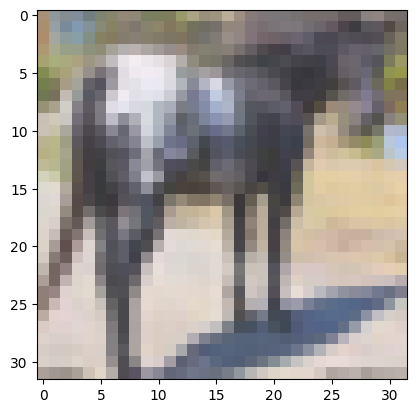

In [3]:
# Visualize a random image
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx])
plt.show()

In [4]:
# Build CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # 10 classes for CIFAR objects
])

C:\Users\Siddhi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
H = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_test, Y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5967 - loss: 1.1432 - val_accuracy: 0.5848 - val_loss: 1.1808
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6146 - loss: 1.1066 - val_accuracy: 0.5778 - val_loss: 1.2242
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6284 - loss: 1.0654 - val_accuracy: 0.6120 - val_loss: 1.1103
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6386 - loss: 1.0376 - val_accuracy: 0.6095 - val_loss: 1.1330
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.6510 - loss: 1.0116 - val_accuracy: 0.5820 - val_loss: 1.2630
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.6589 - loss: 0.9774 - val_accuracy: 0.5833 - val_loss: 1.1708
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.6673 - loss: 0.9633 - val_accuracy: 0.6274 - val_loss: 1.0728
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6790 - loss: 0.9309 - 

In [7]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Loss = %.3f" % test_loss)
print("Accuracy = %.3f" % test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5391 - loss: 1.3144
Loss = 1.319
Accuracy = 0.540


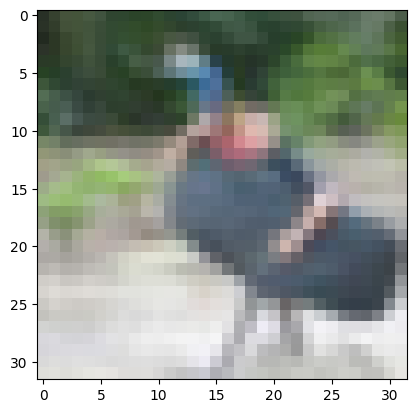

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Handwritten number in image is 3


In [10]:
import numpy as np
n = random.randint(0, 9099)
plt.imshow(X_test[n], cmap='gray')
plt.show()
prediction = model.predict(X_test)
print("Handwritten number in image is %d" % np.argmax(prediction[n]))

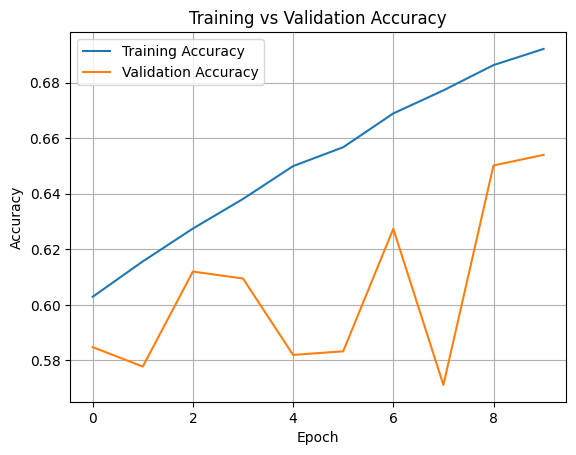

In [13]:
# Plot training and validation accuracy
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()